In [7]:
import numpy as np
import matplotlib.pyplot as plt
from styrene.reactor import MultiBed

Test radial flow

In [16]:
IVP_RTOL = 1e-6
N = 3

test_reac = MultiBed()
test_reac.add_radial_bed(72950, heterogeneous=True, n_points=N)
test_reac.set_inlet(T=886, P=1.25)
test_reac.add_radial_bed(82020, heterogeneous=True, n_points=N)
test_reac.add_radial_bed(78330, heterogeneous=True, n_points=N)
test_reac.add_resets(2, T=898.2)
test_reac.add_resets(3, T=897.6)

In [17]:
%%time
test_reac.solve()
print(test_reac.outlet)

{'Feb': 118.94452063659409, 'Fst': 476.3424916374345, 'Fh2': 362.8200378808849, 'Fbz': 12.691533969421712, 'Fme': 106.41845375654978, 'Fto': 111.38645375654977, 'Fee': 12.398533969421711, 'Fh2o': 7777.0, 'T': 890.9639347526717, 'P': 1.1662101815884294}
CPU times: total: 1.42 s
Wall time: 1.43 s


In [10]:
profiles = test_reac.get_dataframe()

In [11]:
profiles.head(5)

,Feb,Fst,Fh2,Fbz,Fme,Fto,Fee,Fh2o,T,P
W,,,,,,,,,,
0.000000,707.000000,7.104000,0.000000,0.293000,0.000000,4.968000,0.000000,7777.0,886.000000,1.250000
0.071808,706.998790,7.105184,0.001180,0.293021,0.000004,4.968004,0.000021,7777.0,885.999713,1.250000
0.789888,706.986695,7.117024,0.012980,0.293236,0.000045,4.968045,0.000236,7777.0,885.996843,1.250000
7.970688,706.865797,7.235364,0.130906,0.295381,0.000458,4.968458,0.002381,7777.0,885.968164,1.249995
79.778692,705.662987,8.412434,1.303513,0.316658,0.004921,4.972921,0.023658,7777.0,885.682942,1.249954


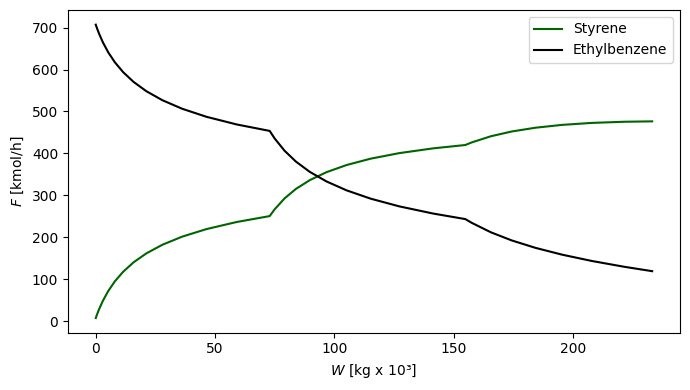

In [12]:
fig, ax = plt.subplots(figsize=[7, 4], dpi=100, sharex=True)

fig.patch.set_facecolor('white')

ax.plot(profiles.index * 1e-3, profiles["Fst"], color="darkgreen", label="Styrene")
ax.plot(profiles.index * 1e-3, profiles["Feb"], color="black", label="Ethylbenzene")

ax.set_ylabel("$F$ [kmol/h]")
ax.set_xlabel("$W$ [kg x 10³]")

ax.legend()

fig.tight_layout()
plt.savefig("../data/composition_profiles_example.png")
plt.show()